In [43]:
import pandas as pd
# Data is from https://www.kaggle.com/yashnaik12/heart-patients
heart_df = pd.read_csv('US_Heart_Patients.csv', encoding='latin-1')

# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='latin-1')
print(heart_df.shape)
print(stroke_df.shape)

(4240, 16)
(5110, 12)


In [44]:
# Missing values
heart_df.isnull().sum(axis = 0)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [45]:
# Number of unique values in each column
heart_df.apply(lambda x: len(x.unique()))

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1365
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [46]:
# Missing Values
stroke_df.isnull().sum(axis = 0)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
# Number of unique values in each column
stroke_df.apply(lambda x: len(x.unique()))

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [48]:
# Drop unneccesary column
stroke_df.dropna(subset=['id'], inplace = True)

In [49]:
#heart_df.dropna(subset=['glucose'], inplace = True)

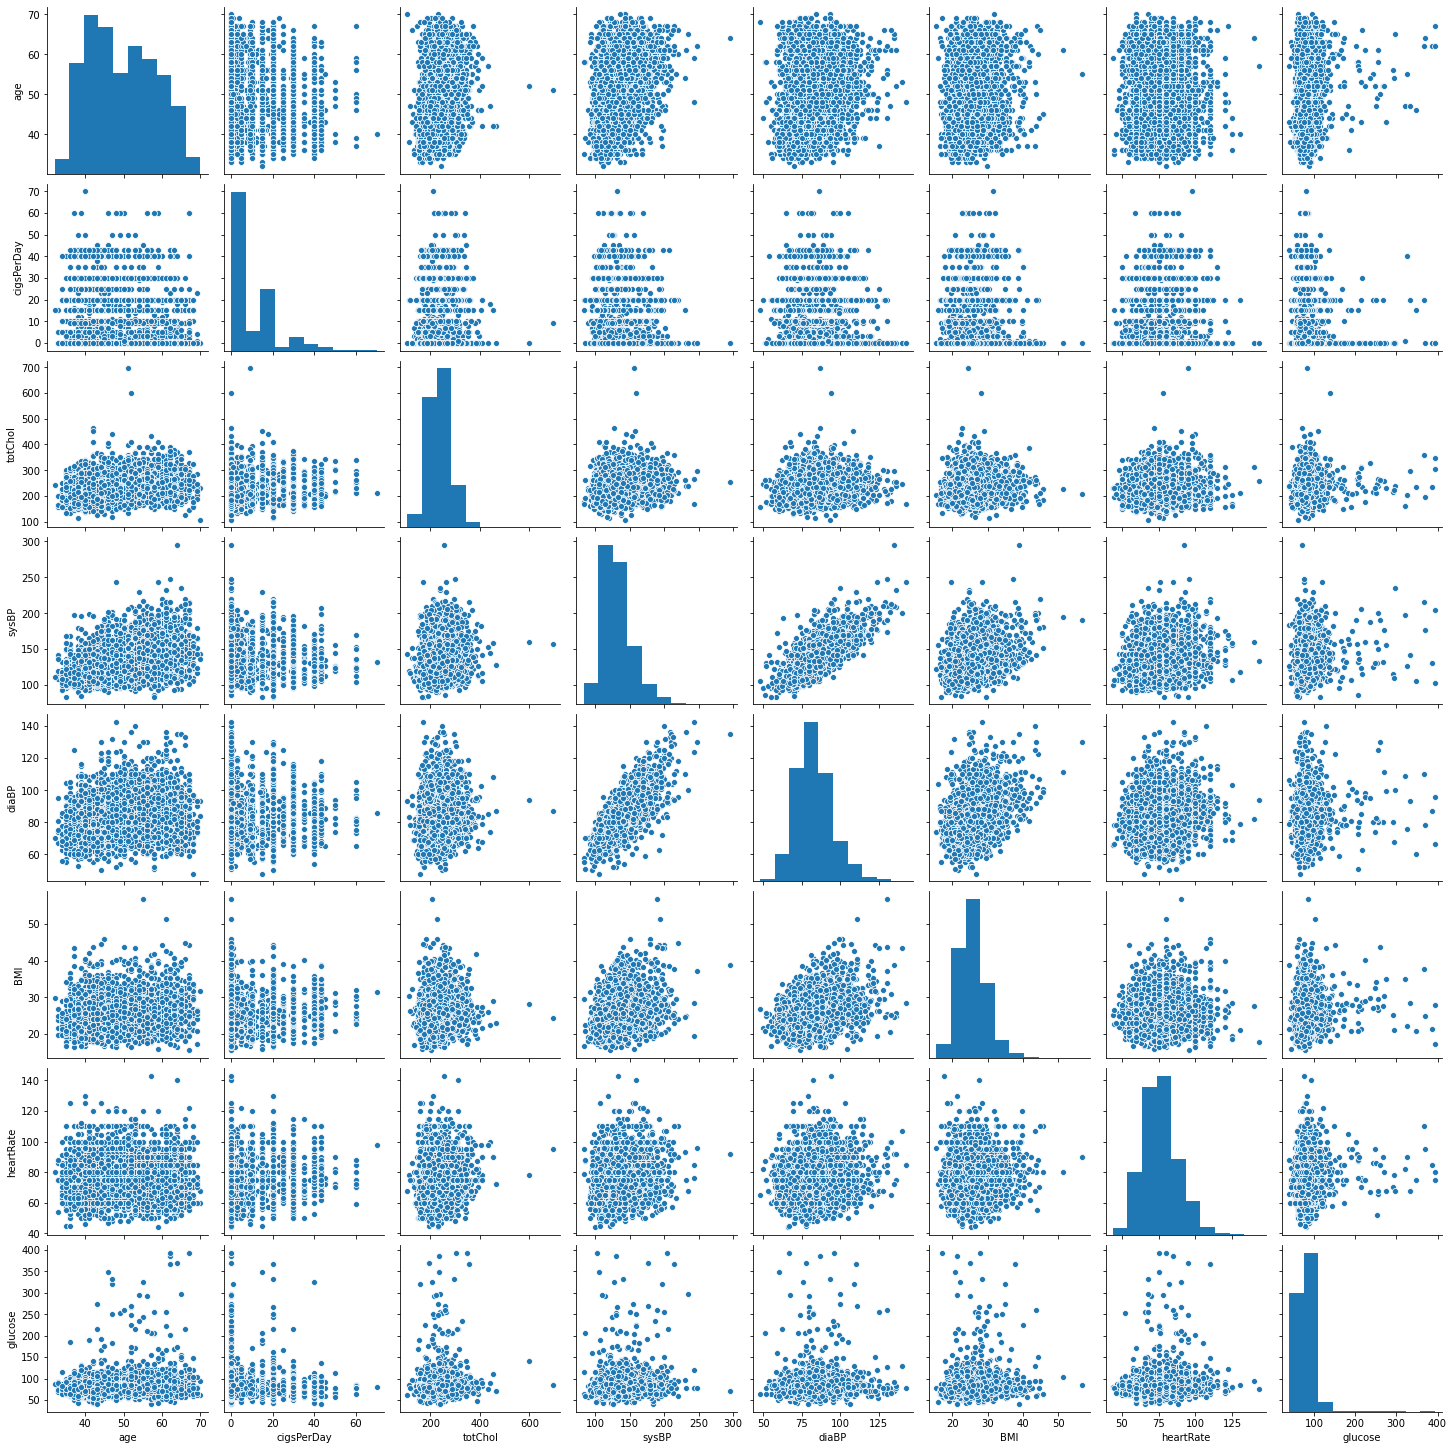

In [50]:
import seaborn as sns
heart_num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

sns.pairplot(data=heart_df[heart_num_cols])

In [51]:
from scipy.stats import normaltest 

for col in heart_num_cols:
    print("normal test - ", normaltest(heart_df[col].dropna()))

normal test -  NormaltestResult(statistic=944.8456031386911, pvalue=6.751249422787796e-206)
normal test -  NormaltestResult(statistic=773.007995707307, pvalue=1.3913823778062656e-168)
normal test -  NormaltestResult(statistic=802.4337194942827, pvalue=5.671941791890863e-175)
normal test -  NormaltestResult(statistic=830.7521119247745, pvalue=4.022267786372565e-181)
normal test -  NormaltestResult(statistic=409.9269479984704, pvalue=9.67150922534752e-90)
normal test -  NormaltestResult(statistic=755.8674069155397, pvalue=7.336316564719284e-165)
normal test -  NormaltestResult(statistic=320.55089074870807, pvalue=2.473195737510001e-70)
normal test -  NormaltestResult(statistic=4559.792179203987, pvalue=0.0)


38


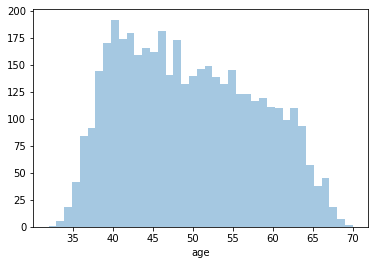

In [52]:
# depending on what version of seaborn you have this might now work
# if it doesn't try the commented out line
# same goes for the next couple plots

# I just want this so I know how many bins to use
print(max(heart_df['age'])-min(heart_df['age']))

sns.distplot(heart_df['age'], bins=39, kde=False)

#sns.histplot(data=heart_df, x='age', discrete=True)

99.0


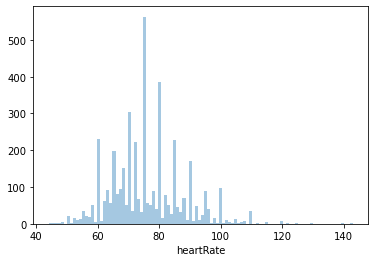

In [53]:
# I just want this so I know how many bins to use
print(max(heart_df['heartRate'])-min(heart_df['heartRate']))

sns.distplot(heart_df['heartRate'], bins=100, kde=False)

#sns.histplot(data=heart_df, x="heartRate", discrete=True)

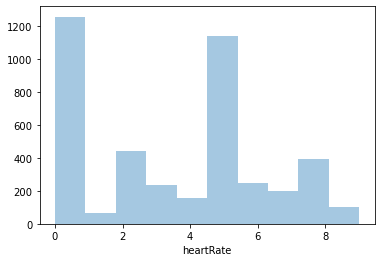

In [54]:
heart_rate = heart_df['heartRate'] % 10

sns.distplot(heart_rate, bins=10, kde=False)

#sns.histplot(data=heartrate, discrete=True)

In [55]:
heart_rate_10 = round(heart_rate/5) * 5
print("normal test - ", normaltest(heart_rate.dropna()))
print("normal test - ", normaltest(heart_rate_10.dropna()))

normal test -  NormaltestResult(statistic=5761.404124682641, pvalue=0.0)
normal test -  NormaltestResult(statistic=438.3491138588045, pvalue=6.51177448895502e-96)


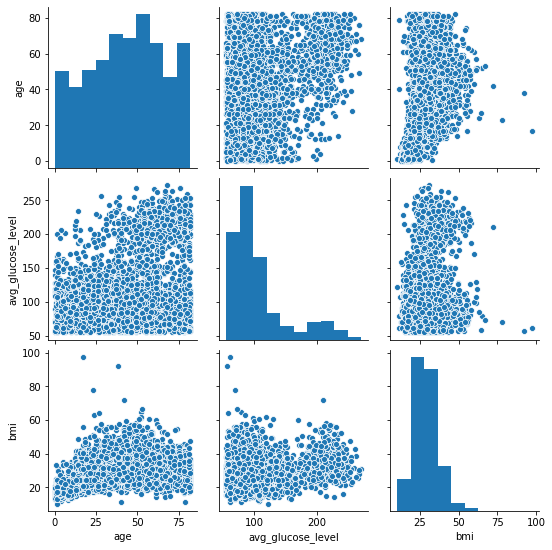

In [56]:
stroke_num_cols = ['age','avg_glucose_level','bmi']

sns.pairplot(data=stroke_df[stroke_num_cols])

In [57]:
for col in stroke_num_cols:
    print("normal test - ", normaltest(stroke_df[col].dropna()))

normal test -  NormaltestResult(statistic=1120.5286442208073, pvalue=4.7895697274981233e-244)
normal test -  NormaltestResult(statistic=1328.9357947091423, pvalue=2.662310941715711e-289)
normal test -  NormaltestResult(statistic=1021.1795052962864, pvalue=1.793444363882936e-222)


In [58]:
#Building ColumnTransformers

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# steps for standardizing the numerical variables
num_steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
]

num_transformer = Pipeline(steps=num_steps)

# steps for ordinal encoding (same as label encoding) for the categorical variables
ord_steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OrdinalEncoder())
]

ord_transformer = Pipeline(steps=ord_steps)

# steps for one hot encoding for the categorical variables
ohe_steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
]

ohe_transformer = Pipeline(steps=ohe_steps)

# all columns 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
#      'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#      'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'

# columns to be transformed
# Numerical Columns
heart_num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
# Categorical Columns with only 2 categories (yes or no mostly)
heart_ord_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
# Categorical Columns with more than 2 categories
heart_ohe_cols = ['education']

# steps for the transformation
heart_transformer_steps = [
    ('num', num_transformer, heart_num_cols),
    ('ord', ord_transformer, heart_ord_cols),
    ('ohe', ohe_transformer, heart_ohe_cols)
]

heart_column_transformer = ColumnTransformer(transformers=heart_transformer_steps, remainder='passthrough')


# columns to be transformed
# Numerical Columns
stroke_num_cols = ['age','avg_glucose_level','bmi']
# Categorical Columns with only 2 categories (yes or no mostly)
stroke_ord_cols = ['hypertension','heart_disease','ever_married','Residence_type']
# Categorical Columns with more than 2 categories
stroke_ohe_cols = ['gender', 'work_type','smoking_status']

# steps for the transformation
stroke_transformer_steps = [
    ('num', num_transformer, stroke_num_cols),
    ('ord', ord_transformer, stroke_ord_cols),
    ('ohe', ohe_transformer, stroke_ohe_cols)
]

stroke_column_transformer = ColumnTransformer(transformers=stroke_transformer_steps, remainder='passthrough')

In [59]:
# Takes in a dataframe and returns under- and over- sampled versions of it
def under_over_sampling(df, target):
    df_0 = df[df[target] == 0]
    df_1 = df[df[target] == 1]
    print(df_0.shape)
    print(df_1.shape)
    
    df_under = df_0.sample(n=df_1.shape[0], random_state=0)
    df_under = df_under.append(df_1)
    
    df_over = df_1.sample(n=df_0.shape[0], replace=True, random_state=0)
    df_over = df_over.append(df_0)
  
    print(df_under.shape)
    print(df_over.shape)
    return [df_under, df_over]

In [60]:
# Seperate out test and train data
heart_df_train = heart_df.sample(frac=0.8, random_state=0)
heart_df_test = heart_df.drop(heart_df_train.index)

stroke_df_train = stroke_df.sample(frac=0.8, random_state=0)
stroke_df_test = stroke_df.drop(stroke_df_train.index)

In [61]:
# # Comparing different Neural Networks
# # Running this cell is optional
# from sklearn.neural_network import MLPClassifier
# from multiprocessing import Pool
# import multitest


# # Dataframe for showing results
# heart_nn_results = pd.DataFrame(columns=['model', 'data', 'test', 'recall', 'precision', 'f'])

# y_test = heart_df_test.loc[:, ['TenYearCHD']]
# X_test = heart_df_test.loc[:, 'male':'glucose']

# # Get under- and over- sampled data sets
# [heart_df_under, heart_df_over] = under_over_sampling(heart_df_train, 'TenYearCHD')

# numbers = [5,10,15,20,25,50,100]
# # List of models to use
# models = []

# for n in numbers:
#     models.append(('Neural Network' + str(n), MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n,), random_state=0, max_iter=20000)))
#     models.append(('Neural Network' + str(n) + ',' + str(n), MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n,n,), random_state=0, max_iter=20000)))
# # models = []

# X_train = heart_df_train.loc[:, 'male':'glucose']
# # Fit column transformer on training data
# heart_column_transformer.fit(X_train)

# # Transform test data
# X_test = heart_column_transformer.transform(X_test)

# # List of data sets
# heart_dfs = [(heart_df_train,'base')]
# params = []

# # Generate every combination of the data sets and models and create parameter list for a function in next step
# for df in heart_dfs:
#     for model in models:
#         params.append((model, df[1], heart_column_transformer.transform(df[0].loc[:, 'male':'glucose']),  df[0].loc[:, ['TenYearCHD']], X_test, y_test, 1.5))

# rows_list = []
# # Run all the models in parallel
# PROCESSES = len(params)
# with Pool(PROCESSES) as pool:
#     results = [pool.apply_async(multitest.split_train_score, p) for p in params]
#     for r in results:
#         for row in r.get():
#             rows_list.append(row)
        
# heart_nn_results = pd.DataFrame(rows_list)
# train_df = heart_nn_results[heart_nn_results['test'] == 'train']
# train_df

(2879, 16)
(513, 16)
(1026, 16)
(5758, 16)


,model,data,test,recall,precision,f,cm
0,Neural Network5,base,train,0.132554,0.715789,0.176906,"[[2852, 27], [445, 68]]"
3,"Neural Network5,5",base,train,0.198830,0.698630,0.254951,"[[2835, 44], [411, 102]]"
6,Neural Network10,base,train,0.253411,0.695187,0.315005,"[[2822, 57], [383, 130]]"
9,"Neural Network10,10",base,train,0.434698,0.777003,0.502862,"[[2815, 64], [290, 223]]"
12,Neural Network15,base,train,0.339181,0.704453,0.403568,"[[2806, 73], [339, 174]]"
15,"Neural Network15,15",base,train,0.563353,0.850000,0.628576,"[[2828, 51], [224, 289]]"
18,Neural Network20,base,train,0.424951,0.762238,0.491928,"[[2811, 68], [295, 218]]"
21,"Neural Network20,20",base,train,0.959064,0.989940,0.968357,"[[2874, 5], [21, 492]]"
24,Neural Network25,base,train,0.508772,0.772189,0.568437,"[[2802, 77], [252, 261]]"
27,"Neural Network25,25",base,train,1.000000,1.000000,1.000000,"[[2879, 0], [0, 513]]"


In [62]:
# # Comparing different Neural Networks on stroke data
# # Running this cell is optional
# from sklearn.neural_network import MLPClassifier
# from multiprocessing import Pool
# import multitest

# # Dataframe for showing results
# stroke_nn_results = pd.DataFrame(columns=['model', 'data', 'test', 'recall', 'precision', 'f2'])

# # Seperate out test and train data
# stroke_df_train = stroke_df.sample(frac=0.8, random_state=0)
# stroke_df_test = stroke_df.drop(stroke_df_train.index)

# y_test = stroke_df_test.loc[:, ['stroke']]
# X_test = stroke_df_test.loc[:, 'gender':'smoking_status']

# # Get under- and over- sampled data sets
# [stroke_df_under, stroke_df_over] = under_over_sampling(stroke_df_train, 'stroke')

# # List of models to use
# numbers = [5,10,15,20,25,50,100]
# # List of models to use
# models = []

# for n in numbers:
#     models.append(('Neural Network' + str(n), MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n,), random_state=0, max_iter=20000)))
#     models.append(('Neural Network' + str(n) + ',' + str(n), MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n,n,), random_state=0, max_iter=20000)))
# # models = []

# # models = []

# X_train = stroke_df_train.loc[:, 'gender':'smoking_status']
# # Fit column transformer on training data
# stroke_column_transformer.fit(X_train)

# # Transform test data
# X_test = stroke_column_transformer.transform(X_test)

# # List of data sets
# stroke_dfs = [(stroke_df_train,'base')]
# params = []

# # Generate every combination of the data sets and models and create parameter list for a function in next step
# for df in stroke_dfs:
#     for model in models:
#         params.append((model, df[1], stroke_column_transformer.transform(df[0].loc[:, 'gender':'smoking_status']),  df[0].loc[:, ['stroke']], X_test, y_test, 1.5))

# rows_list = []
# # Run all the models in parallel
# PROCESSES = len(params)
# with Pool(PROCESSES) as pool:
#     results = [pool.apply_async(multitest.split_train_score, p) for p in params]
#     for r in results:
#         for row in r.get():
#             rows_list.append(row)
        
# stroke_nn_results = pd.DataFrame(rows_list)
# train_df = stroke_nn_results[stroke_nn_results['test'] == 'train']
# train_df

(3895, 12)
(193, 12)
(386, 12)
(7790, 12)


,model,data,test,recall,precision,f,cm
0,Neural Network5,base,train,0.062176,0.571429,0.085667,"[[3886, 9], [181, 12]]"
3,"Neural Network5,5",base,train,0.093264,0.818182,0.128219,"[[3891, 4], [175, 18]]"
6,Neural Network10,base,train,0.134715,0.650000,0.178176,"[[3881, 14], [167, 26]]"
9,"Neural Network10,10",base,train,0.461140,0.809091,0.531465,"[[3874, 21], [104, 89]]"
12,Neural Network15,base,train,0.388601,0.742574,0.455395,"[[3869, 26], [118, 75]]"
15,"Neural Network15,15",base,train,0.984456,0.994764,0.987605,"[[3894, 1], [3, 190]]"
18,Neural Network20,base,train,0.393782,0.775510,0.464068,"[[3873, 22], [117, 76]]"
21,"Neural Network20,20",base,train,1.000000,1.000000,1.000000,"[[3895, 0], [0, 193]]"
24,Neural Network25,base,train,0.647668,0.856164,0.700129,"[[3874, 21], [68, 125]]"
27,"Neural Network25,25",base,train,1.000000,1.000000,1.000000,"[[3895, 0], [0, 193]]"


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from multiprocessing import Pool
import multitest


# Dataframe for showing results
heart_results = pd.DataFrame(columns=['model', 'data', 'test', 'recall', 'precision', 'f2'])

# Seperate out test and train data
heart_df_train = heart_df.sample(frac=0.8, random_state=0)
heart_df_test = heart_df.drop(heart_df_train.index)

y_test = heart_df_test.loc[:, ['TenYearCHD']]
X_test = heart_df_test.loc[:, 'male':'glucose']

# Get under- and over- sampled data sets
[heart_df_under, heart_df_over] = under_over_sampling(heart_df_train, 'TenYearCHD')

# List of models to use
models = [
    ('NaiveBayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=2000)),
    ('Neural Network', MLPClassifier(solver='lbfgs',
                                     hidden_layer_sizes=(20, ), random_state=0, max_iter=20000))
]

# models = []

X_train = heart_df_train.loc[:, 'male':'glucose']
# Fit column transformer on training data
heart_column_transformer.fit(X_train)

# Transform test data
X_test = heart_column_transformer.transform(X_test)

# List of data sets
heart_dfs = [(heart_df_train,'base'), (heart_df_under,'undersampled'), (heart_df_over,'oversampled')]
params = []

# Generate every combination of the data sets and models and create parameter list for a function in next step
for df in heart_dfs:
    for model in models:
        params.append((model, df[1], heart_column_transformer.transform(df[0].loc[:, 'male':'glucose']),  df[0].loc[:, ['TenYearCHD']], X_test, y_test, 1.5))

        
rows_list = []
# Run all the models in parallel
PROCESSES = len(params)
with Pool(PROCESSES) as pool:
    results = [pool.apply_async(multitest.split_train_score, p) for p in params]
    for r in results:
        for row in r.get():
            rows_list.append(row)
        
heart_results = pd.DataFrame(rows_list)

(2879, 16)
(513, 16)
(1026, 16)
(5758, 16)


In [64]:
threshold_df = heart_results[heart_results['test'] == 'test']
threshold_df.sort_values('f', ascending=False)

,model,data,test,recall,precision,f,cm
13,Logistic Regression,undersampled,test,0.687023,0.263930,0.460087,"[[466, 251], [41, 90]]"
22,Logistic Regression,oversampled,test,0.671756,0.262687,0.454148,"[[470, 247], [43, 88]]"
25,Neural Network,oversampled,test,0.511450,0.270161,0.401198,"[[536, 181], [64, 67]]"
19,NaiveBayes,oversampled,test,0.366412,0.358209,0.363848,"[[631, 86], [83, 48]]"
10,NaiveBayes,undersampled,test,0.358779,0.350746,0.356268,"[[630, 87], [84, 47]]"
16,Neural Network,undersampled,test,0.564885,0.190722,0.352252,"[[403, 314], [57, 74]]"
7,Neural Network,base,test,0.229008,0.370370,0.259481,"[[666, 51], [101, 30]]"
1,NaiveBayes,base,test,0.213740,0.437500,0.253659,"[[681, 36], [103, 28]]"
4,Logistic Regression,base,test,0.106870,0.875000,0.146420,"[[715, 2], [117, 14]]"


In [65]:
threshold_df = heart_results[heart_results['test'] == 'threshold']
threshold_df.sort_values('f', ascending=False)

,model,data,test,recall,precision,f,cm
5,Logistic Regression,base,threshold,0.664122,0.281553,0.468323,"[[495, 222], [44, 87]]"
2,NaiveBayes,base,threshold,0.748092,0.230588,0.442515,"[[390, 327], [33, 98]]"
23,Logistic Regression,oversampled,threshold,0.977099,0.175103,0.405557,"[[114, 603], [3, 128]]"
14,Logistic Regression,undersampled,threshold,0.977099,0.171812,0.400096,"[[100, 617], [3, 128]]"
20,NaiveBayes,oversampled,threshold,0.954198,0.172176,0.397992,"[[116, 601], [6, 125]]"
11,NaiveBayes,undersampled,threshold,1.000000,0.160343,0.382955,"[[31, 686], [0, 131]]"
26,Neural Network,oversampled,threshold,0.557252,0.223926,0.382199,"[[464, 253], [58, 73]]"
17,Neural Network,undersampled,threshold,0.572519,0.188442,0.351859,"[[394, 323], [56, 75]]"
8,Neural Network,base,threshold,0.389313,0.280220,0.347666,"[[586, 131], [80, 51]]"


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from multiprocessing import Pool
import multitest

# Dataframe for showing results
stroke_results = pd.DataFrame(columns=['model', 'data', 'test', 'recall', 'precision', 'f2'])

# Seperate out test and train data
stroke_df_train = stroke_df.sample(frac=0.8, random_state=0)
stroke_df_test = stroke_df.drop(stroke_df_train.index)

y_test = stroke_df_test.loc[:, ['stroke']]
X_test = stroke_df_test.loc[:, 'gender':'smoking_status']

# Get under- and over- sampled data sets
[stroke_df_under, stroke_df_over] = under_over_sampling(stroke_df_train, 'stroke')

# List of models to use
models = [
    ('NaiveBayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=2000)),
    ('Neural Network', MLPClassifier(solver='lbfgs',
                                     hidden_layer_sizes=(25, ), random_state=0, max_iter=20000))
]

# models = []

X_train = stroke_df_train.loc[:, 'gender':'smoking_status']
# Fit column transformer on training data
stroke_column_transformer.fit(X_train)

# Transform test data
X_test = stroke_column_transformer.transform(X_test)

# List of data sets
stroke_dfs = [(stroke_df_train,'base'), (stroke_df_under,'undersampled'), (stroke_df_over,'oversampled')]
params = []

# Generate every combination of the data sets and models and create parameter list for a function in next step
for df in stroke_dfs:
    for model in models:
        params.append((model, df[1], stroke_column_transformer.transform(df[0].loc[:, 'gender':'smoking_status']),  df[0].loc[:, ['stroke']], X_test, y_test, 1.5))

rows_list = []
# Run all the models in parallel
PROCESSES = len(params)
with Pool(PROCESSES) as pool:
    results = [pool.apply_async(multitest.split_train_score, p) for p in params]
    for r in results:
        for row in r.get():
            rows_list.append(row)
        
stroke_results = pd.DataFrame(rows_list)

(3895, 12)
(193, 12)
(386, 12)
(7790, 12)


In [67]:
test_df = stroke_results[stroke_results['test'] == 'test']
test_df.sort_values('f', ascending=False)

,model,data,test,recall,precision,f,cm
13,Logistic Regression,undersampled,test,0.839286,0.156667,0.358568,"[[713, 253], [9, 47]]"
22,Logistic Regression,oversampled,test,0.767857,0.142857,0.327283,"[[708, 258], [13, 43]]"
10,NaiveBayes,undersampled,test,0.803571,0.119363,0.290755,"[[634, 332], [11, 45]]"
16,Neural Network,undersampled,test,0.660714,0.118590,0.274543,"[[691, 275], [19, 37]]"
1,NaiveBayes,base,test,1.000000,0.079433,0.219013,"[[317, 649], [0, 56]]"
19,NaiveBayes,oversampled,test,1.000000,0.072165,0.201774,"[[246, 720], [0, 56]]"
25,Neural Network,oversampled,test,0.214286,0.139535,0.183962,"[[892, 74], [44, 12]]"
7,Neural Network,base,test,0.160714,0.150000,0.157258,"[[915, 51], [47, 9]]"
4,Logistic Regression,base,test,0.000000,0.000000,0.000000,"[[966, 0], [56, 0]]"


In [68]:
threshold_df = stroke_results[stroke_results['test'] == 'threshold']
threshold_df.sort_values('f', ascending=False)

,model,data,test,recall,precision,f,cm
2,NaiveBayes,base,threshold,0.642857,0.157205,0.329577,"[[773, 193], [20, 36]]"
23,Logistic Regression,oversampled,threshold,0.875000,0.120098,0.298221,"[[607, 359], [7, 49]]"
5,Logistic Regression,base,threshold,0.482143,0.159763,0.297458,"[[824, 142], [29, 27]]"
14,Logistic Regression,undersampled,threshold,0.910714,0.113586,0.288261,"[[568, 398], [5, 51]]"
17,Neural Network,undersampled,threshold,0.660714,0.113150,0.265453,"[[676, 290], [19, 37]]"
11,NaiveBayes,undersampled,threshold,1.000000,0.081871,0.224691,"[[338, 628], [0, 56]]"
20,NaiveBayes,oversampled,threshold,1.000000,0.081752,0.224414,"[[337, 629], [0, 56]]"
8,Neural Network,base,threshold,0.250000,0.132075,0.196121,"[[874, 92], [42, 14]]"
26,Neural Network,oversampled,threshold,0.178571,0.131579,0.160891,"[[900, 66], [46, 10]]"
